In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/ford_train.tsv", sep="\t", header=None)

In [3]:
df[0] = (df[0]+1)/2

In [4]:
good = df[df[0]==1]
X = good.iloc[:,1:].values

In [5]:
model = tf.keras.Sequential(
    [ 
    
    # input
    tf.keras.layers.Input(shape=(X.shape[1],)),
    
    # deconstruct / encode
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Dense(4),
    
    # reconstruction / decode
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Dense(16),
    
    # output
    tf.keras.layers.Dense(X.shape[1])
    ]
)
model.compile(loss="mse")

In [6]:
model.fit(X,X, epochs=100, batch_size=32)

Epoch 1/100

55/55 [==============================] - 1s 3ms/step - loss: 0.9101
Epoch 2/100
55/55 [==============================] - 0s 2ms/step - loss: 0.7584
Epoch 3/100
55/55 [==============================] - 0s 2ms/step - loss: 0.7455
Epoch 4/100
55/55 [==============================] - 0s 3ms/step - loss: 0.7191
Epoch 5/100
55/55 [==============================] - 0s 2ms/step - loss: 0.6858
Epoch 6/100
55/55 [==============================] - 0s 3ms/step - loss: 0.6812
Epoch 7/100
55/55 [==============================] - 0s 2ms/step - loss: 0.6809
Epoch 8/100
55/55 [==============================] - 0s 3ms/step - loss: 0.6806
Epoch 9/100
55/55 [==============================] - 0s 3ms/step - loss: 0.6805
Epoch 10/100
55/55 [==============================] - 0s 3ms/step - loss: 0.6807
Epoch 11/100
55/55 [==============================] - 0s 3ms/step - loss: 0.6805
Epoch 12/100
55/55 [==============================] - 0s 3ms/step - loss: 0.6806
Epoch 13/100
55/55 [================

55/55 [==============================] - 0s 2ms/step - loss: 0.6789
Epoch 100/100
55/55 [==============================] - 0s 2ms/step - loss: 0.6790


## Encontrar umbral (threshold)

In [7]:
test = df.iloc[:,1:]

In [8]:
X_rec = model.predict(X)

55/55 [==============================] - 0s 2ms/step


In [9]:
rec_err = np.sum((X-X_rec)**2, axis=1)

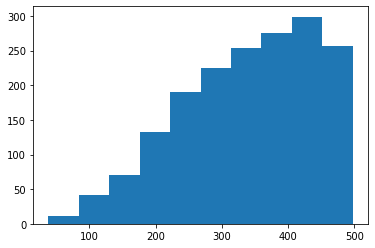

In [10]:
plt.hist(rec_err);

In [11]:
threshold = 400

## Evaluación

In [12]:
pred = model.predict(test)

113/113 [==============================] - 0s 2ms/step


In [13]:
err = np.sum((test-pred)**2, axis=1)

In [14]:
y_test = df.iloc[:,0]

In [15]:
y_pred = np.where(err>threshold, 0, 1)

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
confusion_matrix(y_test, y_pred)

array([[1035,  811],
       [ 597, 1158]], dtype=int64)